# Supervised Machine Learning

## Data

### Loading Data

The first step in any machine learning endeavor is to `get the raw data` into our system.

The raw data might be 
* a logfile, 
* dataset file, 
* or database. 

In reality, often we want to retrieve data from multiple sources

**Installing Python packages**
* Python 

In [30]:
! python -V

Python 3.13.0


* Pip

The additional packages that we will be using throughout this book can be installed via the *pip* installer program, which has been part of the Python standard library since Python 3.3

In [31]:
! pip --version

pip 24.3.1 from c:\Users\hyehoshyna\courses\cs3220\MLintro\.venv\Lib\site-packages\pip (python 3.13)



After we have successfully installed Python, we can execute *pip* from the command line terminal to install additional Python packages:

`pip install SomePackage`


Already installed packages can be updated via the `--upgrade` flag:

`pip install SomePackage --upgrade`

* **Core packages**:
    * NumPy >= 1.17.4
    * scikit-learn >= 0.22.0
    * matplotlib >= 3.1.0
    * pandas >= 0.25.3

In [32]:
try:
    import numpy
except ImportError:
    print ("numpy is not installed")

In [33]:
import numpy as np
np.__version__

'2.1.3'

Since its release in 2007, **scikit-learn** has become one of the most popular open
source machine learning libraries for Python. 

scikit-learn provides algorithms for machine learning tasks including classification, regression, dimensionality reduction,
and clustering

In [34]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

Scikit-learn comes with some `standard machine learning datasets`, which means you’re not required to download them from an external website or database.

Examples of the [toy datasets](scikit-learn.org/stable/datasets/toy_dataset.html) available in sklearn include the iris dataset for classification and the diabetes dataset for regression.

In [35]:
# Load scikit-learn's datasets
from sklearn import datasets

In [36]:
# Load digits dataset
digits = datasets.load_digits()

In [37]:
# Load wine dataset
wine_data = datasets.load_wine() 

Executing the code above returns a `dictionary-like object `containing the `data` along with `metadata` about the data it contains. 

In [38]:
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

The data we need is in the `.data` key of the dictionary-like object, but since it’s not an actual dictionary, we can access it as an attribute of the `wine_data` instance as follows: 

In [39]:
wine_data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

This returns an N x M array where N is the number of samples and M is the number of features.  

Let’s use this knowledge to load our data into a pandas DataFrame, which is much easier to manipulate and analyze. 

In [40]:
import pandas as pd

# Convert data to pandas dataframe
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Add the target label
wine_df["target"] = wine_data.target

# Take a preview
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Creating a Simulated Dataset

Sometimes you need to `generate` a dataset of simulated data.

scikit-learn offers many methods for creating simulated data.
1. When we want a dataset designed to be used with *linear regression*, `make_regression`
is a good choice
2. If we are interested in creating a simulated dataset for *classification*, we can use
`make_classification`
3. if we want a dataset designed to work well with *clustering* techniques, scikitlearn offers `make_blobs`

In [41]:
# Load library
from sklearn.datasets import make_regression

# Generate features matrix, target vector, and the true coefficients
features, target, coefficients = make_regression(n_samples = 100,
n_features = 3,
n_informative = 3,
n_targets = 1,
noise = 0.0,
coef = True,
random_state = 1)

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Target Vector
 [-10.37865986  25.5124503   19.67705609]


In [42]:
# Load library
from sklearn.datasets import make_classification

# Generate features matrix and target vector
features, target = make_classification(n_samples = 100,
n_features = 3,
n_informative = 3,
n_redundant = 0,
n_classes = 2,
weights = [.25, .75],
random_state = 1)

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target Vector
 [1 0 0]


In [43]:
# Load library
from sklearn.datasets import make_blobs

# Generate feature matrix and target vector
features, target = make_blobs(n_samples = 100,
n_features = 2,
centers = 3,
cluster_std = 0.5,
shuffle = True,
random_state = 1)

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector
 [0 1 1]


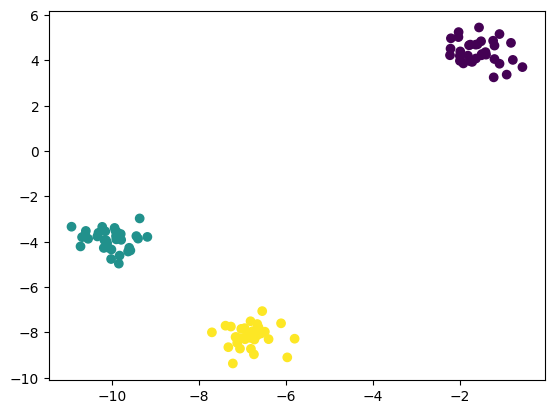

In [44]:
# Load library
import matplotlib.pyplot as plt

#plt.rcParams["figure.figsize"] = (7, 5)

# View scatterplot
plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

We can use the `make_blobs()` function to generate a synthetic *binary classification* dataset.

In [45]:
# define dataset
features, target = make_blobs(n_samples=1000, centers=2, random_state=1)

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[-3.05837272  4.48825769]
 [-8.60973869 -3.72714879]
 [ 1.37129721  5.23107449]]
Target Vector
 [0 1 0]


In [46]:
np.unique(target)

array([0, 1])

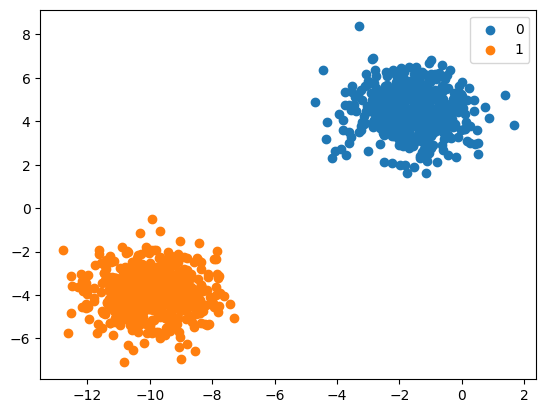

In [47]:
from matplotlib import pyplot

# plot the dataset and color the by class label
for label in np.unique(target):
	row_ix = np.where(target == label)[0]
	pyplot.scatter(features[row_ix, 0], features[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


### Loading a CSV File

Use the pandas library’s `read_csv` to load a local or hosted CSV file:

In [48]:
loan_data = pd.read_csv("data/loan_data.csv")
loan_data.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


### Data exploration

Data exploration is an extremely important step in any data project

We will do a `brief exploration` to get a better idea of `what our dataset contains`; this will give us a better idea of how to process the data

`info()` method of our pandas DataFrame will print a *concise summary* of the wine data contained within the DataFrame.

In [49]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

We can also call the `describe()` method on our DataFrame to get *descriptive statistics* about each feature in the dataset. 

In [50]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


This method is useful for quickly understanding *the distribution of data* in a DataFrame.

### Data preprocessing

Data processing is a vital step in the machine learning workflow because data from the real world is messy. It may contain: 
* Missing values,
* Redundant values
* Outliers
* Errors
* Noise

You must deal with all of this before feeding the data to a machine learning model

Otherwise, the model will incorporate these mistakes into its approximation function – it will learn to make mistakes on new instances. 

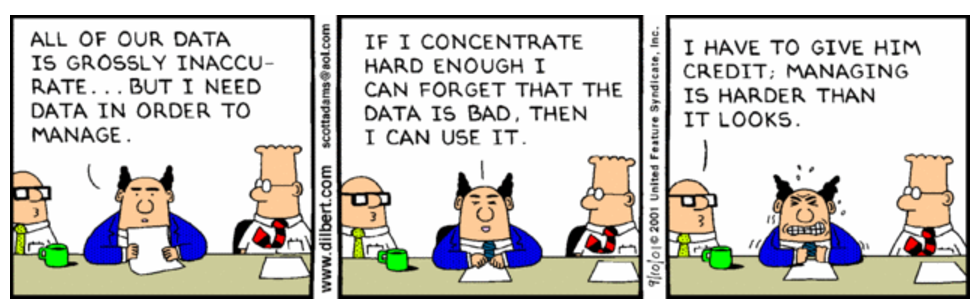

“Garbage in, garbage out.” 

You need to remember:
* ML models typically require numeric data
* our data is on different scales

To resolve the 2nd issue let’s standardize the features using sklearn’s `StandardScaler` class

*StandardScaler* operates on the principle of normalization, where it transforms the distribution of each feature to have a mean of zero and a standard deviation of one. 

This process ensures that` all features are on the same scale`, preventing any single feature from dominating the learning process due to its larger magnitude.

The transformation performed by StandardScaler can be expressed as:

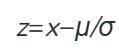

where 
* `x` represents the original feature value, 
* `μ` is the mean of the feature, 
* `σ` is the standard deviation, 
* and `z` is the standardized feature value.

In [51]:
from sklearn.preprocessing import StandardScaler

# Split data into features and label 
X = wine_df[wine_data.feature_names].copy()
y = wine_df["target"].copy() 

# Instantiate scaler and fit on features
scaler = StandardScaler()
scaler.fit(X)

# Transform features
X_scaled = scaler.transform(X.values)

# View first instance
print(X_scaled[0])

[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
  1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
  1.01300893]


c:\Users\hyehoshyna\courses\cs3220\MLintro\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Classification in ML

**Classification** is a `supervised` machine learning method

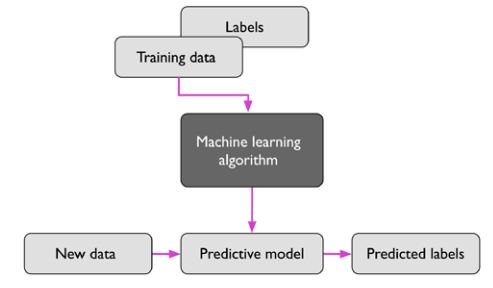

The goal is to `predict the categorical class` *labels* of new instances or data points based on past observations. 

Those class `labels are discrete`

However, the set of class labels does not have to be of a binary nature. The predictive model learned by
a supervised learning algorithm can assign any class label that was presented in the training dataset
to a new, unlabeled data point or instance

### Lazy Learners Vs. Eager Learners

There are 2 types of learners in machine learning classification:
* **Eager learners** 
    * are ML algorithms that first build a model from the training dataset before making any prediction on future datasets. 
    * they spend more time during the training process because of their eagerness to have a better generalization during the training from learning the weights, but they require less time to make predictions. 

Most ML algorithms are eager learners:
* Logistic Regression. 
* Support Vector Machine. 
* Decision Trees. 
* Artificial Neural Networks. 

and

* **Lazy learners or instance-based learners** 
    * do not create any model immediately from the training data
    * they just memorize the training data, and each time there is a need to make a prediction, they search for the nearest neighbor from the whole training data, which makes them very slow during prediction

Some examples of this kind are: 
* K-Nearest Neighbor. 
* Case-based reasoning. 

Even though `classification` and `regression` are both from the category of supervised learning, **they are NOT the same**

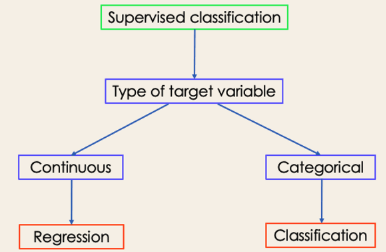

### Different Types of Classification Tasks in ML

There are 4 main classification tasks in Machine learning: *binary, multi-class, multi-label*, and *imbalanced* classifications. 

#### Binary Classification

* The goal is to classify the input data into `2 mutually exclusive categories`. 
* The training data in such a situation is labeled in a binary format: *true* and *false*; *positive* and *negative*

For example, we might want to *detect whether a given image is a truck or a boat*.

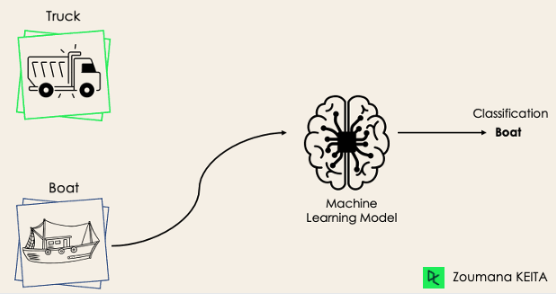

Popular algorithms that can be used for binary classification include:

* Logistic Regression
* k-Nearest Neighbors
* Decision Trees
* Support Vector Machine
* Naive Bayes

In [52]:
# define dataset -  generate a synthetic binary classification dataset.
X, y = make_blobs(n_samples=1000, centers=2, random_state=1)

# summarize dataset shape
print(X.shape, y.shape)

(1000, 2) (1000,)


In [53]:
# Convert data to pandas dataframe
df1 = pd.DataFrame(X, columns=['x1','x2'])

In [54]:
# Add the target label
df1['y'] = y

# Take a preview
df1.head()

,x1,x2,y
0,-3.058373,4.488258,0
1,-8.609739,-3.727149,1
2,1.371297,5.231074,0
3,-9.339176,-2.954447,1
4,-11.571786,-3.852755,1


In [55]:
df1.describe()

,x1,x2,y
count,1000.000000,1000.000000,1000.00000
mean,-5.790269,0.254057,0.50000
std,4.295871,4.300483,0.50025
min,-12.789157,-7.106706,0.00000
25%,-9.953012,-3.925001,0.00000
50%,-5.999543,0.547404,0.50000
75%,-1.585916,4.411628,1.00000
max,1.661519,8.365093,1.00000


In [56]:
from sklearn.preprocessing import StandardScaler

# Split data into features and label 
X = df1.loc[:,:'x2'].copy()
y = df1["y"].copy() 

# Instantiate scaler and fit on features
scaler = StandardScaler()
scaler.fit(X)

# Transform features
X_scaled = scaler.transform(X.values)

c:\Users\hyehoshyna\courses\cs3220\MLintro\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
print(X_scaled[0])

[0.6362536  0.98507979]


There are several ways to **split data into train and test sets**, but scikit-learn has a built-in function to do this on our behalf called `train_test_split()`.

In [58]:
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,y,train_size=.7,random_state=25)

# Check the splits are correct
print(f"Train size: {round(len(X_train_scaled) / len(X) * 100)}%")
print(f"Test size: {round(len(X_test_scaled) / len(X) * 100)}%")

Train size: 70%
Test size: 30%


Building the model

In [59]:
from sklearn.linear_model import LogisticRegression

# Instnatiating the models 
logistic_regression = LogisticRegression()

# Training the models 
logistic_regression.fit(X_train_scaled, y_train)

# Making predictions with each model
log_reg_preds = logistic_regression.predict(X_test_scaled)

In [60]:
log_reg_preds

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

The simplest way to evaluate this model is by using `accuracy`. We check the predictions against the actual values in the test set and count up how many the model got right.

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, log_reg_preds)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [62]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, log_reg_preds)
cm

array([[152,   0],
       [  0, 148]])

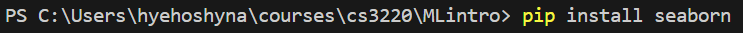

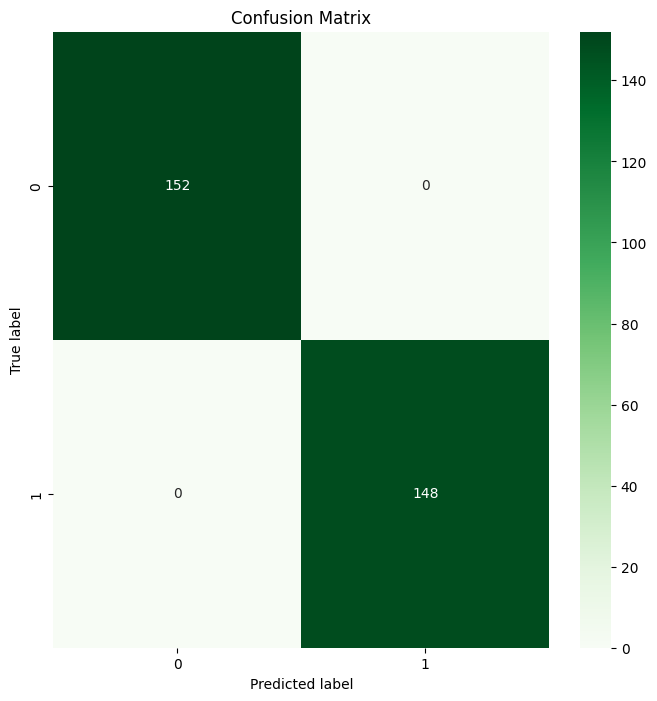

In [63]:
import seaborn as sns
# Visualise a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Let's the `loans dataset` to illustrate some of the previously covered concepts, especially for the `imbalanced datasets` using a `binary classification` task

In [64]:
loan_data.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


Let's look at the Borrowers profile in the dataset.

In [65]:
# Visualize the proportion of borrowers
count = loan_data["not.fully.paid"].value_counts()
count

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

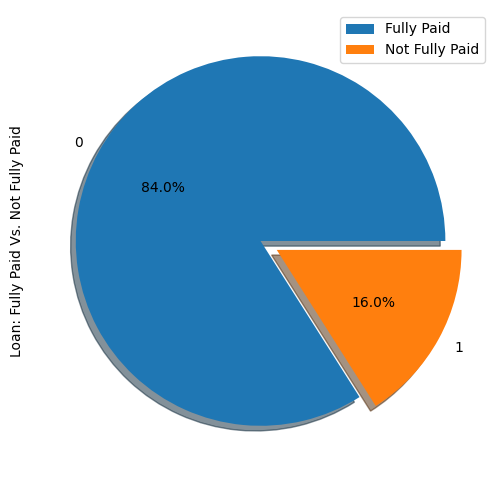

In [66]:
count.plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Loan: Fully Paid Vs. Not Fully Paid")
plt.legend(["Fully Paid", "Not Fully Paid"])
plt.show()

* 84% of the borrowers paid their loans back, 
* and only 16% didn’t pay them back, 

which makes the **dataset** really **imbalanced**

Before further, we need to `check the variables’ type `so that we can encode those that need to be encoded. 

In [67]:
loan_data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

All the columns are numeric variables, except the *purpose* attribute, which `needs to be encoded`

In [68]:
loan_data.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

The *purpose* - `categorical data`

**What is Categorical Data?**

`Categorical` data are variables that `contain label values` rather than numeric values.

The number of possible values is often `limited to a fixed set`.

Categorical variables are often called `nominal`.

**What is the Problem with Categorical Data?**

* Some algorithms can work with categorical data directly (a decision tree).
* Many ML algorithms cannot operate on label data directly. 
    * They require all input variables and output variables to be numeric.

**How to Convert Categorical Data to Numerical Data?**

* `One-Hot Encoding`: a new binary variable is added for each unique value.

    * for example: 
        * a “color” variable with the values: “red“, “green” and “blue“.
        * there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.




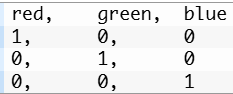

* The `get_dummies()` method in Pandas is used to convert categorical variables into `dummy` variables.

Each category is transformed into a new column with binary value (1 or 0) indicating the presence of the category in the original data.

In [69]:
loan_data.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [70]:
encoded_loan_data = pd.get_dummies(loan_data, prefix="purpose", dtype='int8')
encoded_loan_data.loc[:,"purpose_credit_card":"purpose_small_business"]

,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,0,0
9574,0,0,0,0,0,0
9575,0,1,0,0,0,0
9576,0,0,0,1,0,0


In [71]:
# Check encoded data column types
encoded_loan_data.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_all_other                int8
purpose_credit_card              int8
purpose_debt_consolidation       int8
purpose_educational              int8
purpose_home_improvement         int8
purpose_major_purchase           int8
purpose_small_business           int8
dtype: object

Separate data into `train` and `test`

In [72]:
X = encoded_loan_data.drop('not.fully.paid', axis = 1)
y = encoded_loan_data['not.fully.paid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    stratify = y, random_state=2024)

**Resampling Techniques for Class Imbalances**

***Imbalanced datasets*** are those where there is a severe skew in the class distribution (like ours)

This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important.

One approach to addressing the problem of class imbalance is to `randomly resample the training dataset`. 

The 2 main approaches to randomly resampling an imbalanced dataset are 
* to delete examples from the majority class, called **undersampling**, 
* and to duplicate examples from the minority class, called **oversampling**.

We will undersample the majority class, which corresponds to the “fully paid” (class 0).

**Make sure to split your data into training and testing sets BEFORE resampling!**

If you don’t, you’ll be compromising the quality of your model from data leakage, causing overfitting and poor generalization.

In [73]:
# Import the resampling package
from sklearn.utils import resample

# Returning to one dataframe
training_set = pd.concat([X_train, y_train], axis=1)

# Separating classes
y_fullyPaid = training_set[training_set['not.fully.paid'] == 0]
y_NOTfullyPaid = training_set[training_set['not.fully.paid'] == 1]

In [74]:
y_fullyPaid.head(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,not.fully.paid
4104,1,0.1253,251.00,10.778956,20.51,692,4710.000000,12189,69.3,0,0,0,1,0,0,0,0,0,0,0
9558,0,0.1533,696.57,11.805595,17.21,682,2790.041667,38578,86.9,4,0,0,0,0,1,0,0,0,0,0
1652,1,0.1178,529.75,11.626218,7.77,712,3690.041667,4923,29.0,2,0,0,1,0,0,0,0,0,0,0


In [75]:
print(len(y_fullyPaid), len(y_NOTfullyPaid))

5631 1073


In [76]:
# Undersampling the majority
undersample = resample(y_fullyPaid, 
replace=True, 
n_samples=len(y_NOTfullyPaid), #set the number of samples to equal the number of the minority class
random_state=42)
# Returning to new training set
undersample_train = pd.concat([y_NOTfullyPaid, undersample])

In [77]:
undersample_train.describe()['not.fully.paid']

count    2146.000000
mean        0.500000
std         0.500117
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: not.fully.paid, dtype: float64

In [78]:
undersample_train['not.fully.paid'].value_counts(normalize=True)

not.fully.paid
1    0.5
0    0.5
Name: proportion, dtype: float64

Let's apply the **k-nearest neighbors (kNN) algorithm** - Lazy Learner

This is a popular supervised model used for both classification and regression

**K-Nearest Neighbors: An Overview**

* The algorithm identifies the K nearest neighbors to the input data point based on their distances. 
* In the case of classification, the `algorithm assigns the most common class label among the K neighbors as the predicted label for the input data point`

Let’s take a simple case to understand this algorithm.

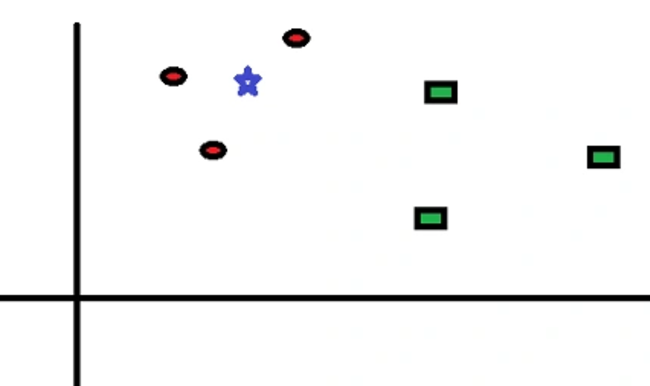

You intend to find out the class of the blue star (BS). BS can either be RC (red circle) or GS (green square) and nothing else.

The “K” in KNN algorithm is the nearest neighbor we wish to take the vote from. 

Let’s say K = 3. 

Hence, we will now make a circle with BS as the center just as big as to enclose only 3 data points on the plane.

3 steps for k-Nearest Neighbors:
* Step 1: Calculate Euclidean Distance.
* Step 2: Get Nearest Neighbors.
* Step 3: Make Predictions.

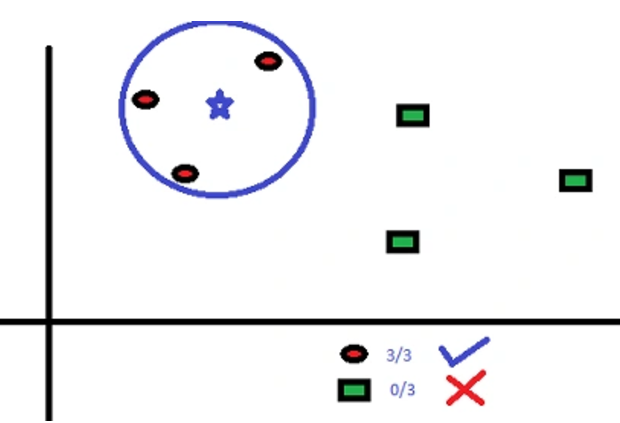

When training a kNN classifier, it's essential to **normalize the features**. 

This is because kNN measures the distance between points. 

The default is to use the *Euclidean Distance*, which is  the square root of the sum of the squared differences between two points.

In [79]:
undersample_train.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,not.fully.paid
count,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2.146000e+03,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000
mean,0.750699,0.126251,327.281724,10.913318,13.024534,705.574091,4484.912007,1.914411e+04,48.702409,1.886300,0.169152,0.071761,0.245107,0.114166,0.417055,0.039143,0.067102,0.035415,0.082013,0.500000
std,0.432709,0.026967,213.512001,0.629217,6.936557,36.704494,2408.490096,4.564934e+04,28.914666,2.496082,0.530469,0.273924,0.430251,0.318087,0.493187,0.193979,0.250256,0.184869,0.274449,0.500117
min,0.000000,0.060000,15.760000,8.476371,0.000000,627.000000,183.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.109600,166.500000,10.491274,7.605000,677.000000,2819.958333,3.163000e+03,25.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.127200,270.170000,10.896739,13.275000,697.000000,4139.958333,8.814000e+03,48.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,1.000000,0.143000,461.197500,11.289782,18.417500,732.000000,5699.729166,1.868875e+04,72.900000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,0.216400,926.830000,14.528354,29.960000,822.000000,15692.000000,1.207359e+06,106.100000,32.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
# Separate undersampled data into X and y sets
undersample_x_train = undersample_train.drop('not.fully.paid', axis=1)
undersample_y_train = undersample_train['not.fully.paid']

undersample_x_train[:3]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
7704,1,0.1025,32.39,9.259131,21.37,702,5310.041667,5430,48.9,0,1,0,0,0,0,1,0,0,0
833,1,0.1324,338.10,11.532728,7.31,667,3823.000000,27452,96.3,2,0,0,0,0,0,1,0,0,0
1924,1,0.1474,518.06,11.082204,22.10,672,4934.041667,23535,66.7,2,0,1,0,0,1,0,0,0,0


In [81]:
undersample_y_train[:3]

7704    1
833     1
1924    1
Name: not.fully.paid, dtype: int64

In our case, `int.rate` is s `between 0.06 and 0.21` while `installment` is much larger (`[15.76..926.83]`). 

If we didn’t normalize this, our calculation would be heavily weighted by *installment* because the numbers are bigger.

We should **normalize the data after splitting** it into training and test sets. 

In [82]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(undersample_x_train)
X_testScaled = scaler.transform(X_test)

**Fitting and Evaluating the Model**

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_trainScaled, undersample_y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred = knn.predict(X_testScaled)

In [85]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5612386917188588


In [86]:
confusion_matrix(y_test,y_pred)

array([[1360, 1054],
       [ 207,  253]])

In [87]:
from sklearn.metrics import classification_report

target_names = ['fullyPaid', 'NOTfullyPaid']
print(classification_report(y_test, y_pred, target_names=target_names))
classification_report(y_test,y_pred)

              precision    recall  f1-score   support

   fullyPaid       0.87      0.56      0.68      2414
NOTfullyPaid       0.19      0.55      0.29       460

    accuracy                           0.56      2874
   macro avg       0.53      0.56      0.48      2874
weighted avg       0.76      0.56      0.62      2874



'              precision    recall  f1-score   support\n\n           0       0.87      0.56      0.68      2414\n           1       0.19      0.55      0.29       460\n\n    accuracy                           0.56      2874\n   macro avg       0.53      0.56      0.48      2874\nweighted avg       0.76      0.56      0.62      2874\n'

#### Multi-Class Classification

**Multi-class classification** refers to those classification tasks that *have more than 2 class labels*.

For example:
* Face classification.
* Plant species classification.
* Optical character recognition.

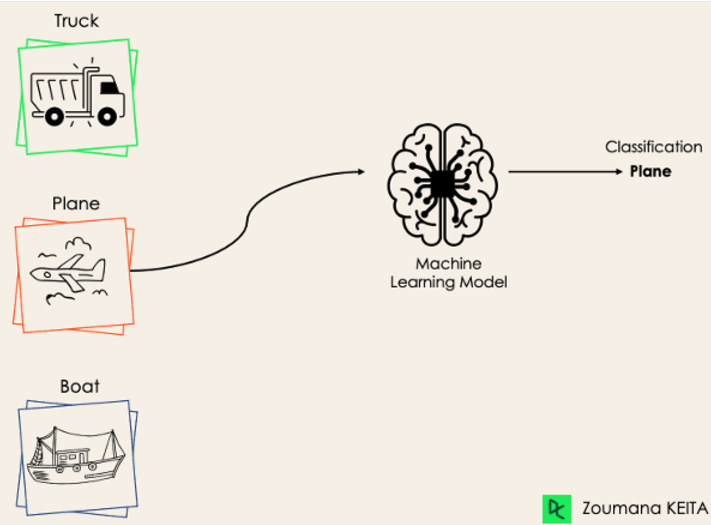

Popular algorithms that can be used for multi-class classification include:
* k-Nearest Neighbors.
* Decision Trees.
* Naive Bayes.
* Random Forest.
* Gradient Boosting.

Algorithms that are designed for binary classification can be adapted for use for multi-class problems.

This involves using `a strategy of fitting multiple binary classification models for each class vs. all other classes` (called one-vs-rest) or one model for each pair of classes (called one-vs-one).

* **One-vs-Rest**: Fit one binary classification model for each class vs. all other classes.
* **One-vs-One**: Fit one binary classification model for each pair of classes.

Binary classification algorithms that can use these strategies for multi-class classification include:
* Logistic Regression.
* Support Vector Machine.

(1000, 2) (1000,)
[-3.05837272  4.48825769] 0
[-8.60973869 -3.72714879] 1
[1.37129721 5.23107449] 0
[-9.33917563 -2.9544469 ] 1
[-8.63895561 -8.05263469] 2
[-8.48974309 -9.05667083] 2
[-7.51235546 -7.96464519] 2
[-7.51320529 -7.46053919] 2
[-0.61947075  3.48804983] 0
[-10.91115591  -4.5772537 ] 1


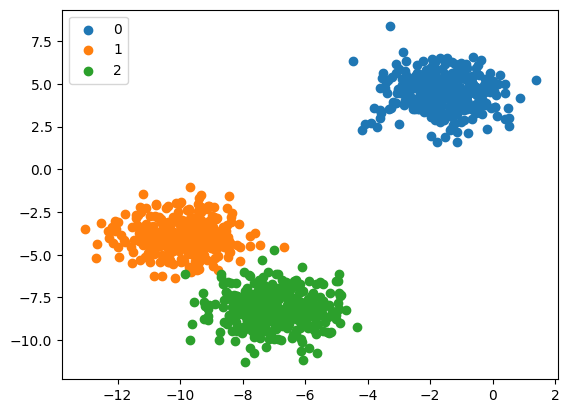

In [88]:
# example of multi-class classification task
# define dataset
X, y = make_blobs(n_samples=1000, centers=3, random_state=1)

# summarize dataset shape
print(X.shape, y.shape)

# summarize first few examples
for i in range(10):
	print(X[i], y[i])
 
# plot the dataset and color the by class label
for label in np.unique(y):
	row_ix = np.where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

**The Decision Tree Algorithm**

A `decision tree` is a flowchart-like tree structure where 
* an internal node represents a *feature*(or attribute), 
* the branch represents a *decision rule*, 
* and each leaf node represents the *outcome*.

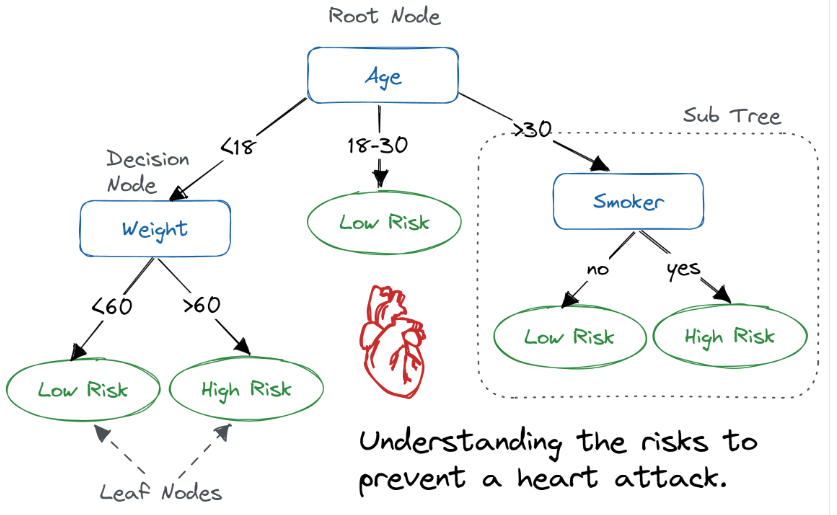

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [91]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


**Visualizing Decision Trees**

Visualizing decision trees can provide insights into the decision-making process of the model, making it easier to interpret and explain the results.

Sklearn's `plot_tree` function. 

This function is part of the `sklearn.tree` module and provides a straightforward way to visualize decision trees. 

It generates a plot that represents the structure of the decision tree, including the nodes and the decision rules.

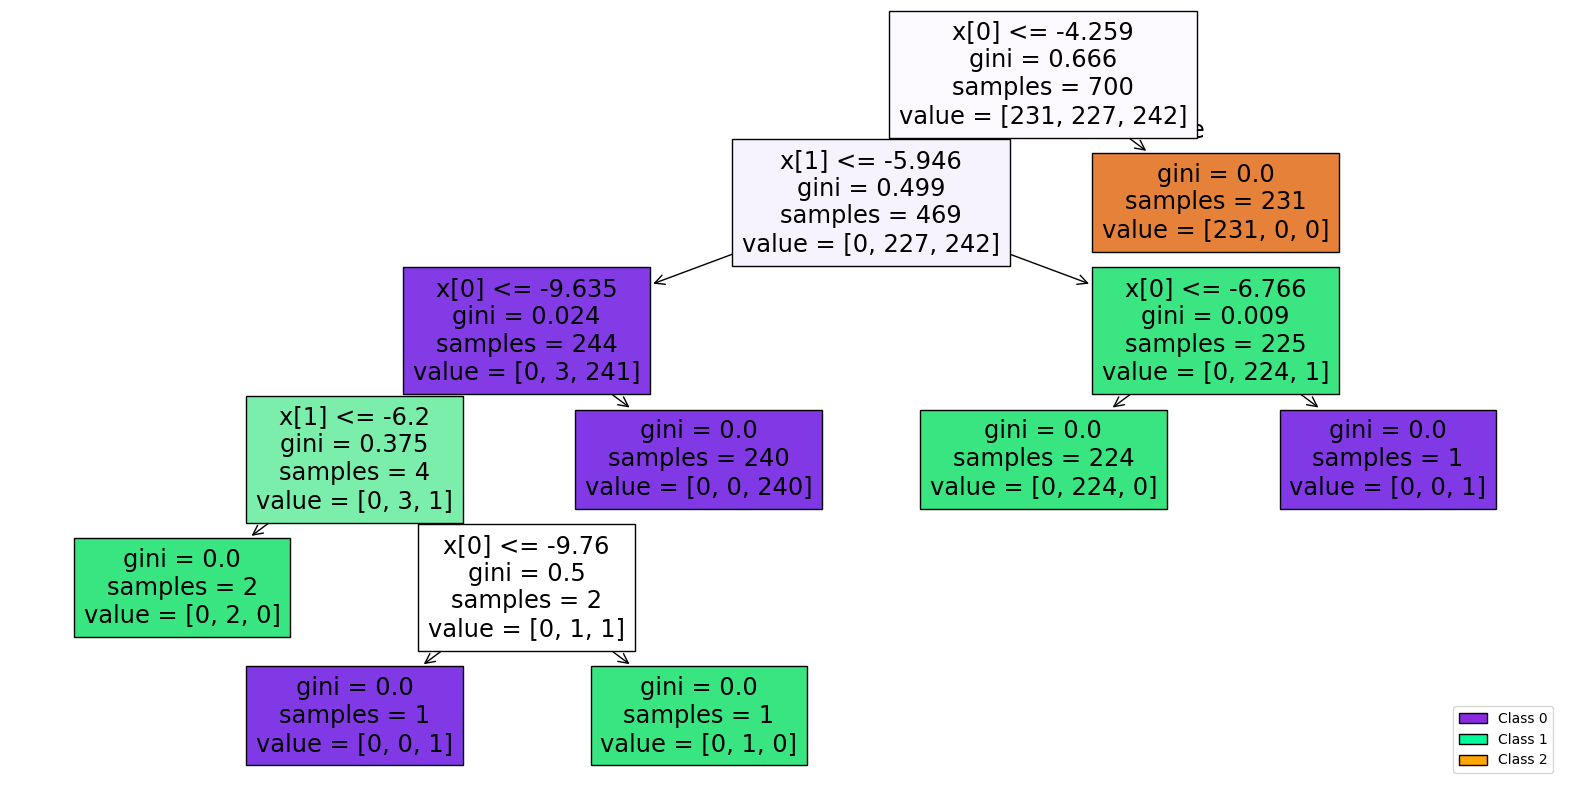

In [92]:
from sklearn import tree
from matplotlib.patches import Patch

# Plot the decision tree
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(20,10))
tree.plot_tree(clf, filled=True)

# Create a custom legend
legend_elements = [Patch(facecolor='blueviolet', edgecolor='black', label='Class 0'),
Patch(facecolor='mediumspringgreen', edgecolor='black', label='Class 1'),
Patch(facecolor='orange', edgecolor='black', label='Class 2')]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='lower right')
plt.show()
plt.show()

Let's consider *Customer Segmentation Task* for an automobile company

Problem descriptions:
* an automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.
* in their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). 
* then, they performed segmented outreach and communication for different segment of customers. 
* this strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

1. Data Importing, Cleaning and EDA

In [35]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Loading the train data
df = pd.read_csv('data/CustomerSegmentation_Train.csv')

# Looking top 10 rows
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [37]:
# Looking the bigger picture
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [38]:
# Checking the number of missing values in each column
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [39]:
# Removing all those rows that have 3 or more missing values
df = df.loc[df.isnull().sum(axis=1)<3]
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       134
Age                  0
Graduated           72
Profession         113
Work_Experience    813
Spending_Score       0
Family_Size        320
Var_1               72
Segmentation         0
dtype: int64

In [40]:
#The count of each category
df.Var_1.value_counts()

Var_1
Cat_6    5232
Cat_4    1084
Cat_3     820
Cat_2     422
Cat_7     201
Cat_1     133
Cat_5      85
Name: count, dtype: int64

In [41]:
# Filling the missing values w.r.t other attributes underlying pattern 
df.loc[ (pd.isnull(df['Var_1'])) & (df['Graduated'] == 'Yes'),"Var_1"] = 'Cat_6'
df.loc[ (pd.isnull(df['Var_1'])) & (df['Graduated'] == 'No'),"Var_1"] = 'Cat_4'
df.loc[ (pd.isnull(df["Var_1"])) & ((df['Profession'] == 'Lawyer') | (df['Profession'] == 'Artist')),"Var_1"] = 'Cat_6'
df.loc[ (pd.isnull(df["Var_1"])) & (df['Age'] > 40),"Var_1"] = 'Cat_6'

In [42]:
# Checking for null values agaon
df.Var_1.isnull().sum()

np.int64(0)

In [43]:
# Counting Var_1 in each segment
data1 = df.pivot_table(columns='Var_1',index='Segmentation',values='ID',aggfunc='count')
data1

Var_1,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
Segmentation,,,,,,,
A,31,83,223,340,19,1220,49
B,26,106,186,233,20,1241,43
C,26,99,153,118,18,1507,47
D,50,134,258,426,28,1303,62


In [44]:
# Percentage of category of Var_1 in each segment
data2=data1.div(data1.sum(axis=1), axis = 0).round(3)
data2

Var_1,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
Segmentation,,,,,,,
A,0.016,0.042,0.113,0.173,0.010,0.621,0.025
B,0.014,0.057,0.100,0.126,0.011,0.669,0.023
C,0.013,0.050,0.078,0.060,0.009,0.766,0.024
D,0.022,0.059,0.114,0.188,0.012,0.576,0.027


Text(0.5, 1.0, 'Percentage of category of Var_1 in each segment')

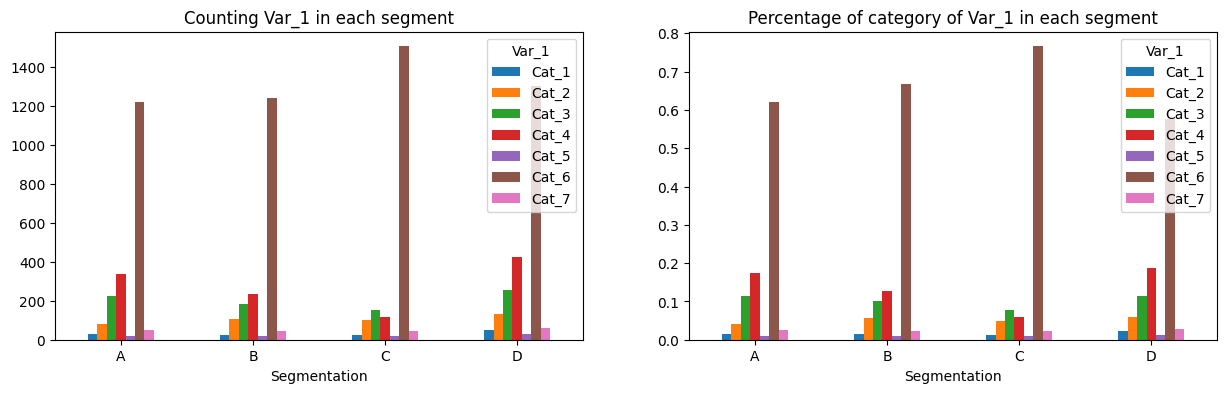

In [45]:
#visualization
fig, ax = plt.subplots(1,2)
data1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title("Counting Var_1 in each segment")


data2.plot(kind="bar",ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title("Percentage of category of Var_1 in each segment")



Note:
* In each of the segment the count of cat_6 or proportion of cat_6 is very high (most of the entries in the given data belongs to cat_6)

Let's explore the next feature - gender

In [46]:
#The count of gender
print(df['Gender'].value_counts())

# Checking the count of missing values
df['Gender'].isnull().sum()

Gender
Male      4409
Female    3640
Name: count, dtype: int64


np.int64(0)

In [47]:
# Counting male-female in each segment
data1=df.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
data1

Gender,Female,Male
Segmentation,,
A,905,1060
B,859,996
C,921,1047
D,955,1306


In [48]:
# Percentage of male-female in each segment
data2 = data1.div(data2.sum(axis=1), axis = 0).round(2)
data2

Gender,Female,Male
Segmentation,,
A,905.00,1060.00
B,859.00,996.00
C,921.00,1047.00
D,956.91,1308.62


Note:
* All the 4 segments have around same number of male-female distribution.

In [49]:
#Count of married vs not married
df.Ever_Married.value_counts()

Ever_Married
Yes    4635
No     3280
Name: count, dtype: int64

In [50]:
# Checking the count of missing values
df.Ever_Married.isnull().sum()

np.int64(134)

In [51]:
#Delete row with dummy value
df.dropna(subset=['Ever_Married'], inplace=True)
df.Ever_Married.value_counts()

Ever_Married
Yes    4635
No     3280
Name: count, dtype: int64

In [53]:
# Checking the count of missing values again
df.Ever_Married.isnull().sum()

np.int64(0)

Similar EDA steps should be performed for all other features

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7915 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7915 non-null   int64  
 1   Gender           7915 non-null   object 
 2   Ever_Married     7915 non-null   object 
 3   Age              7915 non-null   int64  
 4   Graduated        7846 non-null   object 
 5   Profession       7803 non-null   object 
 6   Work_Experience  7121 non-null   float64
 7   Spending_Score   7915 non-null   object 
 8   Family_Size      7603 non-null   float64
 9   Var_1            7915 non-null   object 
 10  Segmentation     7915 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 742.0+ KB


In [55]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           69
Profession         112
Work_Experience    794
Spending_Score       0
Family_Size        312
Var_1                0
Segmentation         0
dtype: int64

In [56]:
df['Graduated'].unique()

array(['No', 'Yes', nan], dtype=object)

In [57]:
df['Work_Experience'].unique()

array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [58]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [71]:
profHealthcare=df.Profession=='Healthcare'
profHealthcareMeanWE=df.loc[profHealthcare,'Work_Experience'].mean()
profHealthcareMeanWE

np.float64(2.5845620121422375)

In [72]:
# Filling the missing values for Work_Experience w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Work_Experience"])) & (df['Profession'] == 'Healthcare'),"Work_Experience"] = profHealthcareMeanWE

In [73]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           69
Profession         112
Work_Experience    650
Spending_Score       0
Family_Size        312
Var_1                0
Segmentation         0
dtype: int64

For simplicitty (not aplicable for the real-life case) we just remove all rows with Null 

In [79]:
df1=df.dropna()
df1.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6849 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6849 non-null   int64  
 1   Gender           6849 non-null   object 
 2   Ever_Married     6849 non-null   object 
 3   Age              6849 non-null   int64  
 4   Graduated        6849 non-null   object 
 5   Profession       6849 non-null   object 
 6   Work_Experience  6849 non-null   float64
 7   Spending_Score   6849 non-null   object 
 8   Family_Size      6849 non-null   float64
 9   Var_1            6849 non-null   object 
 10  Segmentation     6849 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 642.1+ KB


Let's exploe 'Age'

In [81]:
df.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    7915.000000
mean       43.497031
std        16.706586
min        18.000000
25%        31.000000
50%        40.000000
75%        53.000000
90%        69.000000
95%        77.000000
99%        87.000000
max        89.000000
Name: Age, dtype: float64

We can divide people in the 4 age groups based on the results above: *'17-30','31-45','46-60','60+'*

https://www.kaggle.com/code/mittalvasu95/multi-class-classification-c103/notebook

#### Multi-Label Classification

**Multi-label classification** refers to those classification tasks that have 2 or more class labels, where `one or more class labels may be predicted for each example`.

For example:
* photo classification, where a given photo may have multiple objects in the scene and a model may predict the presence of multiple known objects in the photo, such as “bicycle,” “apple,” “person,” etc.

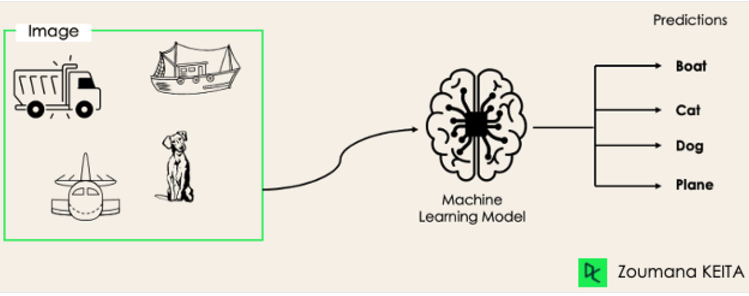

This is unlike binary classification and multi-class classification, where a single class label is predicted for each example.

Classification algorithms used for binary or multi-class classification cannot be used directly for multi-label classification. 

Specialized versions of standard classification algorithms can be used, so-called multi-label versions of the algorithms, including:
* Multi-label Decision Trees
* Multi-label Random Forests
* Multi-label Gradient Boosting